In [40]:
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [41]:
import numpy as np
import pandas as pd
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


10


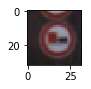

In [42]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

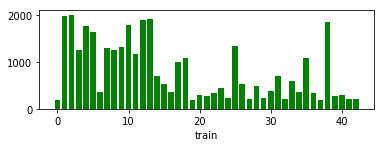

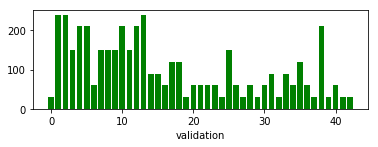

In [43]:
unique, counts = np.unique(y_train, return_counts=True)
myDictionary = dict(zip(unique, counts))
fig, ax = plt.subplots(nrows=1,ncols=1)
plt.subplot(2,1,1)
plt.bar(list(myDictionary.keys()), myDictionary.values(), color='g')
plt.xlabel('train')

#validation data
unique, counts = np.unique(y_valid, return_counts=True)
myDictionary = dict(zip(unique, counts))
fig, ax = plt.subplots(nrows=1,ncols=1)
plt.subplot(2,1,2)
plt.bar(list(myDictionary.keys()), myDictionary.values(), color='g')
plt.xlabel('validation')
plt.show()

In [44]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

import numpy as np
import matplotlib.image as mpimg
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    #gray = (r+g+b)/3
    gray = 0.21 * r + 0.72 * g + 0.07 * b
    gray = gray.reshape(32,32,1)
    return gray

def conversion(list1):
    l = []
    for i in range(len(list1)):
        img = list1[i] 
        gray = rgb2gray(img)
        l.append(gray)
    return l


def normalise(list1):
    l = []
    for i in range(len(list1)):
        img = list1[i]
        norm = (img - 128)/128
        l.append(norm)
    return l

x_gray = conversion(X_train)
x_nor_gray = normalise(x_gray) 

In [45]:
xv_gray = conversion(X_valid)
xv_nor_gray = normalise(xv_gray)

In [46]:
xt_gray = conversion(X_test)
xt_nor_gray = normalise(xt_gray)

In [47]:
x_nor_gray[2].shape

(32, 32, 1)

In [52]:
import tensorflow as tf

EPOCHS = 4
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    #SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    ## 28x28x6 -- 24x24x16.
    # 28,28,6 -- 24,24,16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #24,24,16 ---19,19,24
    conv3_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 16, 24), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(24))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    #conv3 = tf.nn.dropout(conv3, keep_prob)
    #19,19,24 -- 15,15,10
    conv4_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 10), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(10))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
    #conv4 = tf.nn.dropout(conv4, keep_prob)
    #15,15,10 --- 10,10,6
    conv5_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 10, 6), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(6))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)
    #conv5 = tf.nn.dropout(conv5, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    ## 10x10x16 = 1600
    #10,10,6 -- 600
    fc0   = flatten(conv5)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    ## 600 to 400
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    ## 400 -- 200
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400,200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 200. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [53]:
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [54]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [55]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1 })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [56]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_nor_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_nor_gray, y_train = shuffle(x_nor_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_nor_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        training_accuracy = evaluate(x_nor_gray, y_train)    
        validation_accuracy = evaluate(xv_nor_gray, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.919
training Accuracy = 0.940

EPOCH 2 ...
Validation Accuracy = 0.939
training Accuracy = 0.976

EPOCH 3 ...
Validation Accuracy = 0.952
training Accuracy = 0.983

EPOCH 4 ...
Validation Accuracy = 0.964
training Accuracy = 0.989

Model saved


In [57]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(xt_nor_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.943


In [59]:
datanew = pd.read_csv('CarND-Traffic-Sign-Classifier-Project/signnames.csv')

In [62]:
datanew

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [63]:
import matplotlib.image as mpimg
image = mpimg.imread('5_examples/1.png')

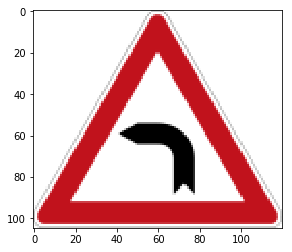

In [65]:
plt.imshow(image)

In [66]:
image.shape

(105, 120, 4)

In [125]:
import PIL
from PIL import Image
import os
#os.listdir("5_examples/")
for i in range(0,len(os.listdir("5_examples/"))):
    img = Image.open("5_examples/" + os.listdir("5_examples/")[i])
    img = img.resize((32,32), PIL.Image.ANTIALIAS)
    img.save("5_examples/" + os.listdir("5_examples/")[i])

(32, 32, 4)
(32, 32, 4)
(32, 32, 4)
(32, 32, 4)
(32, 32, 4)


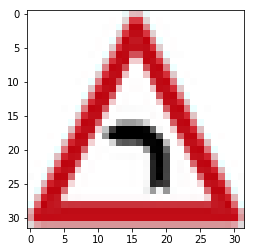

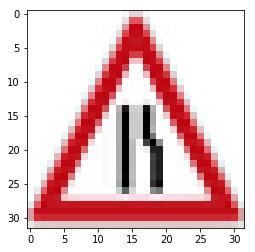

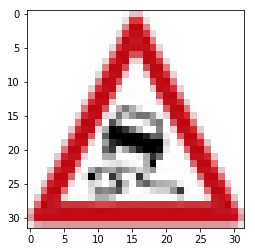

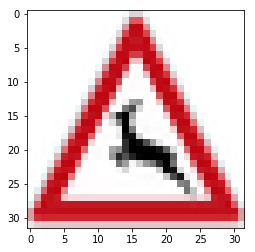

(32, 32, 4)

In [126]:
import os
os.listdir("5_examples/")
imglist = []
for i in range(0,len(os.listdir("5_examples/"))):
    img = mpimg.imread("5_examples/" + os.listdir("5_examples/")[i])
    #img = list(img)
    imglist.append(img)
    plt.imshow(img)
    plt.figure(i+1)
    print(img.shape)
plt.show()
imglist[2].shape

In [127]:
image = imglist[2]
image = (image[:,:,0] + image[:,:,1] + image[:,:,2] + image[:,:,3])/4
image.shape
#plt.imshow(image)

(32, 32)

In [128]:
image = image.reshape(32,32,1)
image.shape

(32, 32, 1)

In [110]:
image.shape

(32, 32)

In [129]:
import numpy as np
import matplotlib.image as mpimg
def rgb2gray1(rgb):

    r, g, b, e = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2], rgb[:,:,3]
    #gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = (r+g+b+e)/4
    #gray = 0.21 * r + 0.72 * g + 0.07 * b
    gray = gray.reshape(32,32,1)
    return gray

def conversion1(list1):
    l = []
    for i in range(len(list1)):
        img = list1[i] 
        gray = rgb2gray1(img)
        l.append(gray)
    return l


def normalise1(list1):
    l = []
    for i in range(len(list1)):
        img = list1[i]
        norm = (img - 128)/128
        l.append(norm)
    return l

In [130]:
imglist1 = conversion1(imglist)
imglist2 = normalise1(imglist1)

In [131]:
web_elp = np.array(imglist2)
web_elp.shape

(5, 32, 32, 1)

In [133]:
y_label = [19, 23, 22, 31, 24]
y_label = np.array(y_label)

In [140]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(web_elp, y_label)
    print("web images Accuracy = {:.3f}".format(test_accuracy))

web images Accuracy = 0.000
